### Importing Libraries

In [430]:
import random
import math
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Coding KMeans from scratch

In [431]:
class KMeans:
    def __init__(self, k, max_iterations, norm):
        self.k = k
        self.max_iterations = max_iterations
        self.norm = norm
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = random.sample(X, self.k)
        
        for i in range(self.max_iterations):
            # Initialize empty clusters
            clusters = [[] for _ in range(self.k)]
            
            # Assign each data point to the nearest centroid
            for x in X:
                if self.norm == 1:
                    distances = [self.manhattan_distance(x, c) for c in self.centroids] 
                if self.norm == 2:
                    distances = [self.euclidean_distance(x, c) for c in self.centroids]
                nearest_centroid_index = distances.index(min(distances))
                clusters[nearest_centroid_index].append(x)
            
            # Update centroids
            old_centroids = self.centroids.copy()
            for j in range(self.k):
                self.centroids[j] = self.mean(clusters[j])
            
            # If the centroids haven't moved, stop iterating
            if  self.centroids == old_centroids:
                break

        output = []
        for i, cluster in enumerate(clusters):
            for c in cluster:
                c.append(i)
            output += cluster

        return output
    
    def predict(self, X):
        # Assign each data point to the nearest centroid
        cluster_assignments = []
        for x in X:
            if self.norm == 1:
                distances = [self.manhattan_distance(x, c) for c in self.centroids] 
            if self.norm == 2:
                distances = [self.euclidean_distance(x, c) for c in self.centroids]
            nearest_centroid_index = distances.index(min(distances))
            #cluster_assignments.append(nearest_centroid_index)
            x[4] = nearest_centroid_index
        return X
    
    def euclidean_distance(self, a, b):
        # L2 Norm
        return math.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))
    
    def manhattan_distance(self, a, b):
        # L1 Norm
        return sum(abs(x - y) for x, y in zip(a, b))
    
    def mean(self, cluster):
        # Compute the mean of a cluster (i.e. the new centroid)
        if not cluster:
            return random.choice(self.centroids)
        return [sum(x) / len(cluster) for x in zip(*cluster)]

### Load Iris Data from sklearn

In [432]:
irisData = load_iris()

In [433]:
#Converting numpy array to a python list
data = irisData.data.tolist()
target = irisData.target.tolist()

### Using KMeans Clustering

In [434]:
# Creating KMeans Model Object (norm: 1-Manhattan distance, 2-Euclidean distance)
# Taken k=3 to create 3 clusters as we have 3 different targets in our dataset
norm=2
kmeans = KMeans(k=3, max_iterations=500, norm=norm)

In [435]:
# Training the model
results = kmeans.fit(data)

In [436]:
# Appending the target to the results for easy comparison
for i, result in enumerate(results):
    result.append(target[i])

In [437]:
# Converting the result to a pandas dataframe for better visualization
results_pd = pd.DataFrame(results, 
                              columns=['Sepal_Length_Cm',
                                        'Sepal_Width_Cm',
                                          'Petal_Length_Cm',
                                            'Petal_Width_Cm',
                                              'Predicted_Clusters',
                                                'Actual_Clusters'])

In [438]:
results_pd

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Length_Cm,Petal_Width_Cm,Predicted_Clusters,Actual_Clusters
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.8,3.2,5.9,2.3,2,2
146,6.7,3.3,5.7,2.5,2,2
147,6.7,3.0,5.2,2.3,2,2
148,6.5,3.0,5.2,2.0,2,2


In [439]:
# Exporting the results to a csv file
results_pd.to_csv(f'Iris_Clustering_L{norm}_Results.csv')

In [440]:
# Predicting the values for our model
predicted_results = kmeans.predict(random.sample(data, 10))
predicted_results_pd = pd.DataFrame(predicted_results, 
                              columns=['Sepal_Length_Cm',
                                        'Sepal_Width_Cm',
                                          'Petal_Length_Cm',
                                            'Petal_Width_Cm',
                                              'Predicted_Clusters',
                                                'Actual_Clusters'])


In [441]:
predicted_results_pd

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Length_Cm,Petal_Width_Cm,Predicted_Clusters,Actual_Clusters
0,4.5,2.3,1.3,0.3,0,0
1,5.4,3.0,4.5,1.5,1,1
2,5.5,2.6,4.4,1.2,1,1
3,4.6,3.4,1.4,0.3,0,0
4,5.9,3.2,4.8,1.8,1,1
5,5.4,3.9,1.7,0.4,0,0
6,6.0,2.7,5.1,1.6,1,1
7,6.8,2.8,4.8,1.4,1,1
8,6.2,2.8,4.8,1.8,1,2
9,5.5,2.4,3.8,1.1,1,1


### Visualization

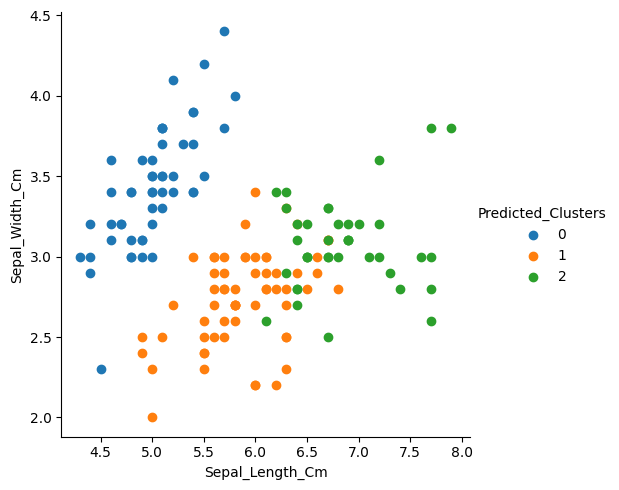

In [442]:
sns.FacetGrid(results_pd, hue="Predicted_Clusters", height=5).map(plt.scatter, "Sepal_Length_Cm", "Sepal_Width_Cm").add_legend();

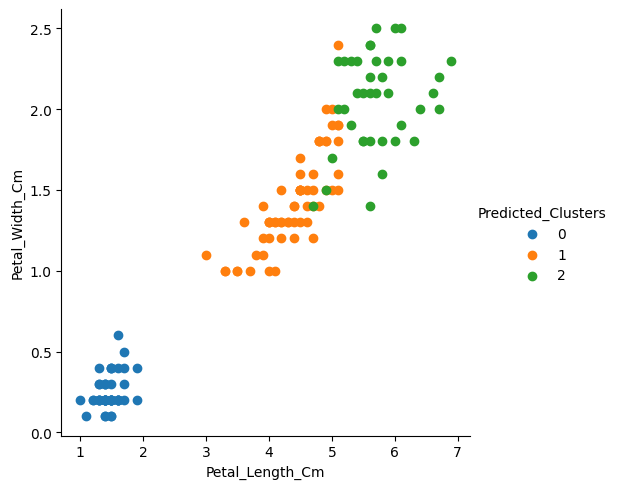

In [443]:
sns.FacetGrid(results_pd, hue="Predicted_Clusters", height=5).map(plt.scatter, "Petal_Length_Cm","Petal_Width_Cm").add_legend();

### Evaluation

In [444]:
#Confusion Matrix
pd.crosstab(results_pd.Actual_Clusters, results_pd.Predicted_Clusters)

Predicted_Clusters,0,1,2
Actual_Clusters,,,
0,50,0,0
1,0,50,0
2,0,11,39


In [445]:
# Calculating accuracy 
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))

In [446]:
# Calculate mean squared error
def mse(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    return sum_error / float(len(actual))

In [447]:
actual = []
predicted = []
for i in range(len(results)):
    predicted.append(results[i][4])
    actual.append(results[i][5])

print(f"Accuracy for L{norm} Norm - {accuracy_metric(actual, predicted)}")
print(f"MSE for L{norm} Norm - {mse(actual, predicted)}")

Accuracy for L2 Norm - 0.9266666666666666
MSE for L2 Norm - 0.07333333333333333
